# 範例重點
了解如何在 Keras 中，加入 regularization <br />
熟悉建立、訓練模型 <br />
熟悉將訓練結果視覺化並比較結果 <br />

In [0]:
import os
import keras
from keras.layers import Input, Dense

#os.environ["CUDA_VISIBLE_DEVICES"] = ""
!nvidia-smi

Using TensorFlow backend.


Wed Jul 17 03:35:24 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
def preproc_x(x, flatten = True):
    x = x / 255.0
    if flatten :
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes = 10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [0]:
train_x = preproc_x(train_x)
test_x = preproc_x(test_x)
train_y = preproc_y(train_y)
test_y = preproc_y(test_y)

In [0]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128], l2_ratio = 1e-4):
    
    input_layer = Input(input_shape, name = "main_input")
    
    for i , n_units in enumerate(num_neurons):
        
        if i == 0 :
            x = Dense(units = n_units, activation = 'relu', name = "hidden_layer" + str(i+1),
                             kernel_regularizer = l2(l2_ratio)) (input_layer)
        else:
            x = Dense(units = n_units, activation = 'relu', name = "hidden_layer" + str(i+1),
                             kernel_regularizer = l2(l2_ratio)) (x)
        
    output_layer = Dense(units = output_units, activation = 'softmax', name = "main_output") (x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [0]:
#Setting hyper-parameters
lr = 1e-3
epochs = 50
batch_size = 256
momentum = 0.95
l2_exp = [1e-2, 1e-4, 1e-8, 1e-12]

In [0]:
results = {}

for regularizer_ratio in l2_exp:
    keras.backend.clear_session()
    print(f"Experiment with regulizer : {regularizer_ratio}")
    model = build_mlp(input_shape = train_x.shape[1:], l2_ratio = regularizer_ratio)
    optimizer = keras.optimizers.Adam(lr = lr)
    model.compile( optimizer = optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
    history = model.fit(train_x, train_y, epochs = epochs, batch_size = batch_size, shuffle = True, validation_data = [test_x, test_y])
    
    name_tag = f"regulizer_{str(regularizer_ratio)}"
    results[name_tag] = {
        'train_loss' : history.history['loss'],
        'valid_loss' : history.history['val_loss'],
        'train_acc' : history.history['acc'],
        'valid_acc' : history.history['val_acc']
    }
    

W0717 03:35:40.513068 140127876085632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0717 03:35:40.526535 140127876085632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 03:35:40.569538 140127876085632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 03:35:40.571224 140127876085632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W071

Experiment with regulizer : 0.01


W0717 03:35:40.900566 140127876085632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 133us/step - loss: 4.5481 - acc: 0.2744 - val_loss: 2.4014 - val_acc: 0.3059
Epoch 2/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.2426 - acc: 0.3296 - val_loss: 2.1322 - val_acc: 0.3328
Epoch 3/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.0711 - acc: 0.3472 - val_loss: 2.0628 - val_acc: 0.3404
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.9956 - acc: 0.3563 - val_loss: 1.9738 - val_acc: 0.3557
Epoch 5/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.9452 - acc: 0.3653 - val_loss: 1.9259 - val_acc: 0.3681
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.9146 - acc: 0.3656 - val_loss: 1.9246 - val_acc: 0.3527
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8899 - acc: 0.3724 - val_loss: 1.8835 - val_ac

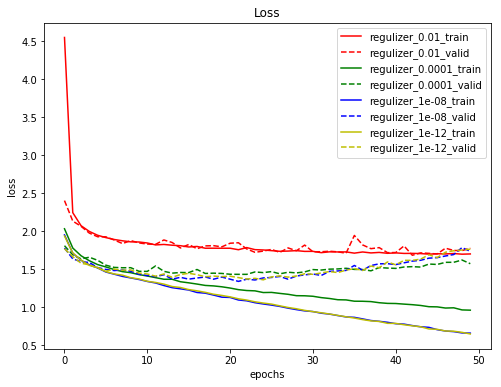

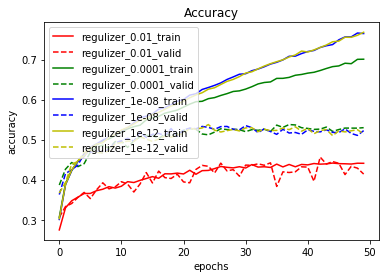

In [0]:
import matplotlib.pyplot as plt

colors = ['r','g','b','y','k','m']
plt.figure(figsize = (8,6))

for i, cond in enumerate(results.keys()):
    plt.plot(results[cond]['train_loss'], '-', label = cond + "_train", color = colors[i])
    plt.plot(results[cond]['valid_loss'], '--', label = cond + "_valid", color = colors[i])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(results[cond]['train_acc'], '-', label = cond + '_train', color = colors[i])
    plt.plot(results[cond]['valid_acc'], '--',label = cond + '_valid', color = colors[i])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Work
請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [0]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

train_x = preproc_x(train_x, False)
test_x = preproc_x(test_x, False)
train_y = preproc_y(train_y)
test_y = preproc_y(test_y)

In [0]:
from keras.layers import Conv2D, Dropout, BatchNormalization, MaxPooling2D, Flatten

def build_mlp2(input_shape, output_units = 10, regularizer = None):
    
    input_layer = Input(input_shape, name = "main_input")
    
    x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_regularizer = regularizer)(input_layer)
    x = BatchNormalization()(x)
    x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_regularizer = regularizer)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_regularizer = regularizer)(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_regularizer = regularizer)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(units = 512, activation = 'relu', kernel_regularizer = regularizer)(x)
    x = Dense(units = 256, activation = 'relu', kernel_regularizer = regularizer)(x)
    x = Dense(units = 128, activation = 'relu', kernel_regularizer = regularizer)(x)
    x = Dropout(0.25)(x)
    
    output_layer = Dense(units = output_units, activation = 'softmax', name = "main_output")(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [0]:
#Setting hyper-parameters
lr = 1e-3
regs = ['l1','l1_l2']
reg_ratios = [1e-4, 1e-6, 1e-8]
epochs = 50
batch_size = 256

In [0]:
results2 = {}

for reg in regs:
    for reg_ratio in reg_ratios:
        
        keras.backend.clear_session()
        print(f"{str(reg)} regularizer with {reg_ratio} regular ratio")
        cur_reg = None
        if reg == 'l1':
            cur_reg = l1(reg_ratio)
        else:
            cur_reg = l1_l2(l1 = reg_ratio, l2 = reg_ratio)
            
        model = build_mlp2(input_shape = train_x.shape[1:],regularizer = cur_reg)
        optimizer = keras.optimizers.Adam(lr = lr)
        model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
        
        history = model. fit(train_x, train_y, epochs = epochs, batch_size = batch_size, shuffle = True, validation_data = [test_x,test_y])
        
        if reg == 'l1':
            name_tag = f"l1_regularizer_{str(reg_ratio)}"
        else:
            name_tag = f"l1_l2_regularizer_{str(reg_ratio)}"
        
        results2[name_tag] = {
        'train_loss' : history.history['loss'],
        'valid_loss' : history.history['val_loss'],
        'train_acc' : history.history['acc'],
        'valid_acc' : history.history['val_acc']
        }

W0717 05:11:28.281584 140127876085632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



l1 regularizer with 0.0001 regular ratio


W0717 05:11:28.477334 140127876085632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0717 05:11:28.489669 140127876085632 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 23s 469us/step - loss: 4.2507 - acc: 0.4527 - val_loss: 3.1632 - val_acc: 0.5559
Epoch 2/50
50000/50000 [==============================] - 19s 387us/step - loss: 2.5076 - acc: 0.6284 - val_loss: 2.3293 - val_acc: 0.6015
Epoch 3/50
50000/50000 [==============================] - 19s 389us/step - loss: 1.8661 - acc: 0.7029 - val_loss: 1.7900 - val_acc: 0.6872
Epoch 4/50
50000/50000 [==============================] - 19s 389us/step - loss: 1.5923 - acc: 0.7365 - val_loss: 1.7344 - val_acc: 0.6663
Epoch 5/50
50000/50000 [==============================] - 19s 389us/step - loss: 1.4404 - acc: 0.7593 - val_loss: 1.4244 - val_acc: 0.7470
Epoch 6/50
50000/50000 [==============================] - 19s 389us/step - loss: 1.3288 - acc: 0.7787 - val_loss: 1.4779 - val_acc: 0.7207
Epoch 7/50
50000/50000 [==============================] - 19s 388us/step - loss: 1.2542 - acc: 0.7912 - val_loss: 1.

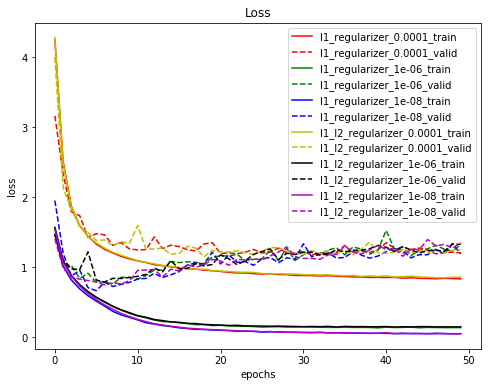

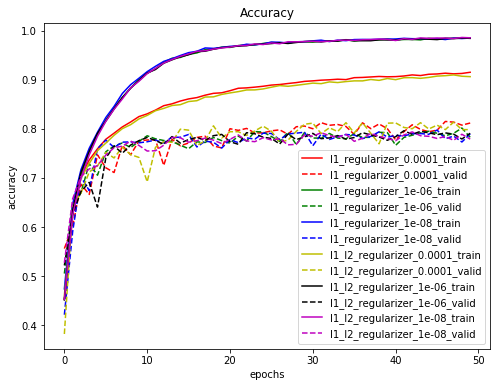

In [0]:
colors = ['r','g','b','y','k','m']
plt.figure(figsize = (8,6))

for i, cond in enumerate(results2.keys()):
    plt.plot(results2[cond]['train_loss'], '-', label = cond + "_train", color = colors[i])
    plt.plot(results2[cond]['valid_loss'], '--', label = cond + "_valid", color = colors[i])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.figure(figsize = (8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(results2[cond]['train_acc'], '-', label = cond + '_train', color = colors[i])
    plt.plot(results2[cond]['valid_acc'], '--',label = cond + '_valid', color = colors[i])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()